<a href="https://colab.research.google.com/github/MuchauA/eagles-final-project/blob/master/Copy_of_Call_Volume_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CALL VOLUME PREDICTION

## **1.0 BUSINESS UNDERSTANDING**

### 1.1  Problem statement
As a result of an increased number of reported cases on child abuse, there is a dire need to have prompt responses. It is crucial that reported cases are acted upon promptly to ensure timely and efficient handling of reported cases.







### 1.2 Business Question
The stakeholders are Mtoto News, a digital company that leverages on technology to improve child wellbeing, and Childline Kenya, an NGO established in response to the state of child protection in Kenya and the manner in which abuse cases were being reported and handled.


### 1.3 Main objective
Building a forecast model that predicts the number of incoming calls that Childline Kenya will receive per hour per day..

### 1.4 Supplementary Objective
Ensuring Childline Kenya is adequately staffed to handle reported cases.


### 1.5 Metric of success
The algorithm will be considered a success if the predictions made by it has a:

**Precision of 90-96%

## **2.0 DATA UNDERSTANDING**

### 2.1 The Dataset

The dataset is provided on [Zindi Africa](https://zindi.africa/competitions/mtoto-news-childline-kenya-call-volume-prediction-challenge), the training data contains all the calls (over 135,000) that were received from 1 January 2016 to 12 July 2016.

Each call contains the following fields:

- calldate - Date (month-day-year) and time of the call

- cc_status - Case status

- maincat - Main category call falls into

- subcat1 - Subcategory call falls under

- casepriority - Priority of the case

- referal -  Place case referred to

- caller_gender - Gender of the caller

- caller_age - Age of the caller

- caller_county - Area where the call came from

- child_age - Age of the child in case

- child_gender - Gender of the child in case

- child_county - Area where the child is from

- parent_age - Age of the parent

- parent_gender - Gender of the parent

- parent_county - Area where the child is from

- Abuser_Relationship - Relationship abuser has with the child in case

- Neglector_Relationship - Relationship neglector has with the child in case

- Physical_abuser_Relationship - Relationship physical abuser has with the child in case.

An explanation of all the columns of the weather data can be found <a href= "https://rp5.ru/Weather_archive_in_Nairobi_(airport)">here</a>

## **3.0 DATA PREPARATION**

### 3.1 Loading libraries

Connecting to Google drive and Importing all the necessary Libraries | Modules.

In [1]:
#connecting collab to google drive 

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import all the relevant libraries

import pandas as pd
import numpy as np
import os, shutil

# visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline




### 3.2 Loading the data

The data was loaded using `os.listdir` method

In [3]:
# print the contents of the mtoto news childline kenya folder 

print(os.listdir('/content/drive/Shareddrives/Eagles/mtoto_news_childline_kenya'))

['NairobiSchoolDates2016.csv', 'Sample_Submission.csv', 'KenyaPublicHolidays2016.csv', 'train.csv', 'WeatherNairobi2016.xlsx', 'train.gsheet']


In [4]:
#store the file paths as variables

weather_file = ('/content/drive/Shareddrives/Eagles/mtoto_news_childline_kenya/WeatherNairobi2016.xlsx')
dates_file = ('/content/drive/Shareddrives/Eagles/mtoto_news_childline_kenya/NairobiSchoolDates2016.csv')
holidays_file = ('/content/drive/Shareddrives/Eagles/mtoto_news_childline_kenya/KenyaPublicHolidays2016.csv')
train_file = ('/content/drive/Shareddrives/Eagles/mtoto_news_childline_kenya/train.csv')

View contents of the files

In [5]:
#print the data in the train file 

train_data = pd.read_csv(train_file)
train_data.head(3)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,13,14,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,calldate,cc_status,maincat,subcat1,casepriority,referal,caller_gender,caller_age,caller_county,child_age,child_gender,child_county,parent_age,parent_gender,parent_county,Abuser_Relationship,Neglector_Relationship,Perpetrator_Relationship,Physical abuser_Relationship
0,2016-01-01 07:26:47,Closed,non-interventional,Blank call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01 07:32:30,Closed,non-interventional,Blank call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01 07:44:31,Closed,non-interventional,Blank call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#print the data in the dates file 

date_data = pd.read_csv(dates_file)
date_data.head(3)

,Term,Opening,Closing,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1,2016-01-04,2016-04-08,NaN,NaN,*year/month/day
1,2,2016-05-02,2016-08-05,NaN,NaN,https://www.standardmedia.co.ke/article/200018...
2,3,2016-09-05,2016-11-18,NaN,NaN,NaN


In [7]:
#print the data in the holidays file 

holiday_data = pd.read_csv(holidays_file, skiprows= 2)
holiday_data.head()

,Date,Holiday,Unnamed: 2
0,2016/01/01,New Years Day,NaN
1,2016/03/25,Good Friday,NaN
2,2016/03/28,Easter Monday,NaN
3,2016/05/01,Labour Day,NaN
4,2016/05/02,Labour Day observed,NaN


In [8]:
# uncomment following line to install pandas update of xlrd
# !pip install --upgrade xlrd
weather_data= pd.read_excel(weather_file, skiprows= 6)

In [9]:
weather_data.head()

,Local time in Nairobi (airport),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
0,31.12.2016 21:00,20.2,NaN,NaN,NaN,68.0,Wind blowing from the east-northeast,8.0,NaN,NaN,...,Altocumulus translucidus at a single level.,"No Cirrus, Cirrocumulus or Cirrostratus.",30.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN
1,31.12.2016 15:00,26.0,NaN,NaN,NaN,40.0,Wind blowing from the north-east,9.0,NaN,NaN,...,"No Altocumulus, Altostratus or Nimbostratus.","No Cirrus, Cirrocumulus or Cirrostratus.",30.0,11.2,NaN,NaN,NaN,NaN,NaN,NaN
2,31.12.2016 09:00,18.8,NaN,NaN,NaN,85.0,Wind blowing from the north-northeast,5.0,NaN,NaN,...,Altocumulus translucidus at a single level.,"No Cirrus, Cirrocumulus or Cirrostratus.",25.0,16.2,Trace of precipitation,24.0,NaN,NaN,NaN,NaN
3,30.12.2016 21:00,19.5,NaN,NaN,NaN,79.0,Wind blowing from the east-northeast,4.0,NaN,NaN,...,Altocumulus translucidus at a single level.,"No Cirrus, Cirrocumulus or Cirrostratus.",20.0,15.8,NaN,NaN,NaN,NaN,NaN,NaN
4,30.12.2016 15:00,24.5,NaN,NaN,NaN,56.0,Wind blowing from the east-northeast,7.0,NaN,NaN,...,Altocumulus translucidus at a single level.,Cirrus spissatus cumulonimbogenitus.,30.0,15.1,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
train_data['maincat'].unique()

array(['non-interventional', 'others', 'general_information',
       'family_community_society', 'health_basic_needs', 'sexuality',
       'abuse', 'education_career'], dtype=object)

### 3.3 Data Cleaning

#### 3.3.0 Train data Cleaning

Checking for 

1.   Validity
2.   Completenes
3.   Consistency
4.   Uniformity



##### 3.3.1 Data Validity


*   Checking for the validity of data in the train_data
*   Removing  irrelevant columns 
*   Merging columns with same information 



In [11]:
# remove the last column since it has irrelevant info
holiday_data.drop('Unnamed: 2',axis= 1, inplace= True)

In [12]:
holiday_data.head()

,Date,Holiday
0,2016/01/01,New Years Day
1,2016/03/25,Good Friday
2,2016/03/28,Easter Monday
3,2016/05/01,Labour Day
4,2016/05/02,Labour Day observed


In [13]:
# remove the last 3 columns since they have irrelevant info
cols_to_drop= ['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5']
date_data.drop(cols_to_drop,axis= 1, inplace= True)

##### 3.3.2 Uniformity

*   Checking different columns to ensure that they are correct.
*   Merging columns with same information
*   Deleteing columns with duplicate entries



In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135988 entries, 0 to 135987
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   calldate                      135988 non-null  object
 1   cc_status                     135988 non-null  object
 2   maincat                       135988 non-null  object
 3   subcat1                       135988 non-null  object
 4   casepriority                  135988 non-null  object
 5   referal                       1262 non-null    object
 6   caller_gender                 11548 non-null   object
 7   caller_age                    10732 non-null   object
 8   caller_county                 8667 non-null    object
 9   child_age                     3979 non-null    object
 10  child_gender                  3992 non-null    object
 11  child_county                  3749 non-null    object
 12  parent_age                    33 non-null      object
 13 

We noticed that in the referal column a lot of the values of the columns are similar both in the text and meaning. We therefore merge the similar values while also rectifying spelling errors.

In [15]:
# merge values similar to children office
similar_to_children_law= ["Childrens", "Childrens Office", "Children's court", "Children's office", "CHILDREN", "Childrens'Court", "children's office", "Children's", "Child",
                          "Childrens officer", "Childrens office", "children's court", "Children's Court", "Childrens court", "children Officer"]
train_data['referal']= train_data['referal'].map(lambda x: 'children office/court' if x in similar_to_children_law else x)

# merge values similar to chief office
similar_to_chief_office= ["Chief's", "Chief's office", "Chief's Office", "Kenya", "Kenya Police", "kenya Police", "chief's office", "Chief officer",
                          "Chief", "Police station", "DO's", "Assistant county commisioners(DOs)"]
train_data['referal']= train_data['referal'].map(lambda x: 'chief/police office' if x in similar_to_chief_office else x)

# merge values similar to OVC rescue centre
similar_to_OVC= ["Children and rescuing centre(OVC)", "Children's rescuing Center(OVC)", "children's rescuing Center(OVC)", "children's rescuing center(OVC)", "OVC"]
train_data['referal']= train_data['referal'].map(lambda x: 'OVC rescue' if x in similar_to_OVC else x)

# similar to constituency fund
similar_to_constituency= ["Constituency", "Constituency Development  Fund(CDF)"]
train_data['referal']= train_data['referal'].map(lambda x: 'constituency dev fund' if x in similar_to_constituency else x)

# similar to education office
similar_to_ed= ["Education", "Education Office"]
train_data['referal']= train_data['referal'].map(lambda x: 'education office' if x in similar_to_ed else x)

# similar to youth hotline
similar_to_youth_hotline= ["Youth", "Youth Hotline 1190", "Youth hotline 1190"]
train_data['referal']= train_data['referal'].map(lambda x: 'youth hotline 1190' if x in similar_to_youth_hotline else x)

# fix a spelling error in 'child welfare sociaty'
train_data['referal']= train_data['referal'].map(lambda x: 'child welfare society' if x == 'child welfare sociaty' else x)

In [16]:
# checking that the values have been changed
train_data['referal'].value_counts()

children office/court                                 788
chief/police office                                   318
Hospital                                               38
constituency dev fund                                  38
education office                                       25
youth hotline 1190                                     22
OVC rescue                                              8
CRADDLE                                                 4
GENDER                                                  4
FIDA                                                    3
Area                                                    2
CLAN                                                    1
child welfare society                                   1
Charitable                                              1
Amani                                                   1
World                                                   1
Save                                                    1
CARE          

We repeat the process for any other columns with the same issue.

In [17]:
# fixing a capitalisation issue in casepriority
train_data['casepriority']= train_data['casepriority'].map(lambda x: 'Non Critical' if x == 'non Critical' else x)

In [18]:
# fixing a spelling error in subcategory1
train_data['subcat1']= train_data['subcat1'].map(lambda x: 'Children rights/ issues' if x == 'Childrenï¿½s rights/ issues' else x)

In [19]:
# fixing a typo in the age columns
train_data['caller_age']= train_data['caller_age'].map(lambda x: '11-15' if x == '2016-11-15 00:00:00' else x)
train_data['caller_age']= train_data['caller_age'].map(lambda x: '6-10' if x == '2016-06-10 00:00:00' else x)


In [20]:
# combine the 10-15 and 11-15 values
train_data['child_age']= train_data['child_age'].map(lambda x: '11-15' if (x== '2016-11-15 00:00:00' or x== '2016-10-15 00:00:00' or x==' 11-15') else x)
train_data['child_age']= train_data['child_age'].map(lambda x: '6-10' if x == '2016-06-10 00:00:00' else x)

In [21]:
# removing the distinction btwn certain texts that mean the same thing in the abuser relationship column
train_data['Abuser_Relationship']= train_data['Abuser_Relationship'].map(lambda x: 'Neighbor' if (x== 'Neighbour' or x== 'Neigbour') else x)
train_data['Abuser_Relationship']= train_data['Abuser_Relationship'].map(lambda x: 'Father' if x== 'father' else x)
train_data['Abuser_Relationship']= train_data['Abuser_Relationship'].map(lambda x: 'Unknown' if (x== 'Unspecified relationship' or x== 'unknown' or x== 'Undisclosed relationship' or x== 'Concerned') else x)
train_data['Abuser_Relationship']= train_data['Abuser_Relationship'].map(lambda x: 'Parent' if x== 'Parents' else x)
train_data['Abuser_Relationship']= train_data['Abuser_Relationship'].map(lambda x: 'Uncle' if x== 'Uncles' else x)
train_data['Abuser_Relationship']= train_data['Abuser_Relationship'].map(lambda x: 'Extended' if x== 'Extended Family' else x)
train_data['Abuser_Relationship']= train_data['Abuser_Relationship'].map(lambda x: 'Teacher' if x== 'Student' else x)
train_data['Abuser_Relationship']= train_data['Abuser_Relationship'].map(lambda x: 'Romantic Partner' if (x== 'Romantic parner' or x== 'Partner') else x)

In [22]:
# removing distinctions in the neglector relationship column
train_data['Neglector_Relationship']= train_data['Neglector_Relationship'].map(lambda x: 'Parent' if x== 'Parents' else x)
train_data['Neglector_Relationship']= train_data['Neglector_Relationship'].map(lambda x: 'Father' if x== 'father' else x)
train_data['Neglector_Relationship']= train_data['Neglector_Relationship'].map(lambda x: 'GrandMother' if x== 'Grandmother' else x)
train_data['Neglector_Relationship']= train_data['Neglector_Relationship'].map(lambda x: 'Step-Mother' if x== 'Step mother' else x)

In [23]:
# removing distinctions in the perpertrator relationship column
train_data['Perpetrator_Relationship']= train_data['Perpetrator_Relationship'].map(lambda x: 'Father' if (x== 'father' or x== 'Father ') else x)
train_data['Perpetrator_Relationship']= train_data['Perpetrator_Relationship'].map(lambda x: 'Mother' if (x== 'mother' or x== 'mother ') else x)
train_data['Perpetrator_Relationship']= train_data['Perpetrator_Relationship'].map(lambda x: 'Neighbor' if (x== 'neighbor' or x== 'neighbour' or x== 'Neighbour' or x== 'Neigbour') else x)
train_data['Perpetrator_Relationship']= train_data['Perpetrator_Relationship'].map(lambda x: 'Romantic partner' if (x== 'romantic partner' or x== 'Romantic Parner' or x== 'Romantic parner') else x)
train_data['Perpetrator_Relationship']= train_data['Perpetrator_Relationship'].map(lambda x: 'Extended' if x== 'Extended family' else x)
train_data['Perpetrator_Relationship']= train_data['Perpetrator_Relationship'].map(lambda x: 'Parent' if (x== 'Parents' or x== 'Parents' or x== 'parents') else x)
train_data['Perpetrator_Relationship']= train_data['Perpetrator_Relationship'].map(lambda x: 'Unknown' if (x== 'unspecified relationship' or x== 'Assistant Chief') else x)
train_data['Perpetrator_Relationship']= train_data['Perpetrator_Relationship'].map(lambda x: 'Uncle' if x== 'uncle' else x)
train_data['Perpetrator_Relationship']= train_data['Perpetrator_Relationship'].map(lambda x: 'Guardian' if x== 'guardian' else x)
train_data['Perpetrator_Relationship']= train_data['Perpetrator_Relationship'].map(lambda x: 'Step-Mother' if x== 'step-mother' or x== 'Step mother' else x)
train_data['Perpetrator_Relationship']= train_data['Perpetrator_Relationship'].map(lambda x: 'Grandmother' if x== 'grandmother' else x)
train_data['Perpetrator_Relationship']= train_data['Perpetrator_Relationship'].map(lambda x: 'Teacher' if (x== 'teacher' or x== 'student') else x)

In [24]:
# removing distinctions in the physical abuser relationship column
train_data['Physical abuser_Relationship']= train_data['Physical abuser_Relationship'].map(lambda x: 'Father' if x== 'father' else x)
train_data['Physical abuser_Relationship']= train_data['Physical abuser_Relationship'].map(lambda x: 'Mother' if x== 'mother' else x)
train_data['Physical abuser_Relationship']= train_data['Physical abuser_Relationship'].map(lambda x: 'Friend' if x== 'peer' else x)
train_data['Physical abuser_Relationship']= train_data['Physical abuser_Relationship'].map(lambda x: 'Parent' if x== 'Parents' else x)
train_data['Physical abuser_Relationship']= train_data['Physical abuser_Relationship'].map(lambda x: 'Neighbor' if (x== 'Naighbor' or x== 'Neighbour') else x)
train_data['Physical abuser_Relationship']= train_data['Physical abuser_Relationship'].map(lambda x: 'Step-Mother' if x== 'Step-Mother ' else x)

Here we merge the Abuser_Relationship, Neglector_Relationship, Physical abuser_Relationship, Perpetrator_Relationship columns as they seem to refer to the same person (the person who did the abuse)

In [25]:
# here we check if any of the rows have any data filled into more than one of the 4 columns
zipped= zip(train_data['Abuser_Relationship'], train_data['Neglector_Relationship'],
            train_data['Physical abuser_Relationship'], train_data['Perpetrator_Relationship'])
clashing_columns= 0
for i,j,k,l in zipped:
  check_for_na= not pd.isna(i) and not pd.isna(j) and not pd.isna(k) and not pd.isna(l)
  if check_for_na:
    clashing_columns+=1

In [26]:
# here we make a column 'abuser_relationship' and add values from the other 4 columns into it
train_data['abuser_relationship']= None
zipped= zip(train_data['Abuser_Relationship'], train_data['Neglector_Relationship'],
            train_data['Physical abuser_Relationship'], train_data['Perpetrator_Relationship'])
ind= 0
for i,j,k,l in zipped:
    if not pd.isna(i):
        train_data['abuser_relationship'][ind]= i
        continue
    elif not pd.isna(j):
        train_data['abuser_relationship'][ind]= j
        continue
    elif not pd.isna(k):
        train_data['abuser_relationship'][ind]= k
        continue
    elif not pd.isna(l):
        train_data['abuser_relationship'][ind]= l
    ind+=1

Aside from deleting the Abuser_Relationship, Neglector_Relationship, Physical abuser_Relationship, Perpetrator_Relationship...
we delete the parent age column, because in the values each unique numerical value only has one entry and it would therefore not help us in modeling or EDA.
We also drop the parent county column as it has very little non-null data

In [27]:
cols_to_drop= ['parent_age', 'parent_county', 'Abuser_Relationship',
               'Neglector_Relationship', 'Physical abuser_Relationship', 'Perpetrator_Relationship']
train_data.drop(cols_to_drop, axis= 1, inplace= True)

In [28]:
# observing clean train_data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135988 entries, 0 to 135987
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   calldate             135988 non-null  object
 1   cc_status            135988 non-null  object
 2   maincat              135988 non-null  object
 3   subcat1              135988 non-null  object
 4   casepriority         135988 non-null  object
 5   referal              1262 non-null    object
 6   caller_gender        11548 non-null   object
 7   caller_age           10732 non-null   object
 8   caller_county        8667 non-null    object
 9   child_age            3979 non-null    object
 10  child_gender         3992 non-null    object
 11  child_county         3749 non-null    object
 12  parent_gender        69 non-null      object
 13  abuser_relationship  597 non-null     object
dtypes: object(14)
memory usage: 14.5+ MB


##### 3.3.3 Consistency

In [29]:
# checking for duplicates

print(f'The data has {train_data.duplicated().sum()} duplicates')

The data has 2037 duplicates


#### 3.3.0  Weather data cleaning

We delete all columns besides:
- 'T'(temperature)
- 'U'(humidity)
- 'Ff'(wind speed)
- 'N'(cloud cover)
- 'Cl'(Types of clouds present) - (stratocumulus, stratus, cumulus, cumulonimbus)
- 'H'(height of the base of the clouds that are present
- 'Cm'(more types of clouds that are present) - (altocumulus, altostratus, nimbostratus)
- 'Ch'(more types of clouds) - (cirrus, cirrocumulus, cirrostratus)

Because these are the only useful ones to our project.<br>
We also rename the columns to better represent the information they have.

In [30]:
# specifying the columns to keep
cols_to_keep= ['Local time in Nairobi (airport)','T','U', 'Ff', 'N', 'H']

# specifying column names
weather_cols= ['dateTime', 'temperature', 'humidity', 'wind_speed', 'total_cloud_cover', 'cloud_height']

weather= weather_data[cols_to_keep]
weather.columns= weather_cols

# observing clean weather data
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   dateTime           1367 non-null   object 
 1   temperature        1367 non-null   float64
 2   humidity           1360 non-null   float64
 3   wind_speed         1366 non-null   float64
 4   total_cloud_cover  1367 non-null   object 
 5   cloud_height       1325 non-null   object 
dtypes: float64(3), object(3)
memory usage: 64.2+ KB


For the humidity and wind_speed columns, we fill the null values with the means of their corresponding columns.<br>
For the cloud_height column, we fill the null values with the mode because its dtype is 'object'<br>
We chose this method of filling null values because it invokes the least changes in the distributions of the various columns.

In [31]:
weather['humidity'].fillna(weather['humidity'].mean(), inplace= True)
weather['wind_speed'].fillna(weather['wind_speed'].mean(), inplace= True)
weather['cloud_height'].fillna(weather['cloud_height'].value_counts().index[0], inplace= True);

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


##### 3.3.4 Completeness

*   Handling missing values in weather dataframe



In [32]:
# checking to see if missing values have been replaced

print(f'The data has {weather.isna().sum().sum()} missing values')

The data has 0 missing values


##### 3.3.5 Consistecy

*   Checking for duplicates



In [33]:
# checking for duplicates

print(f'The data has {weather.duplicated().sum()} duplicates')

The data has 0 duplicates


## **4.0 EDA**

##### 4.1 Relationship between callers age  and child's age

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Child age')]

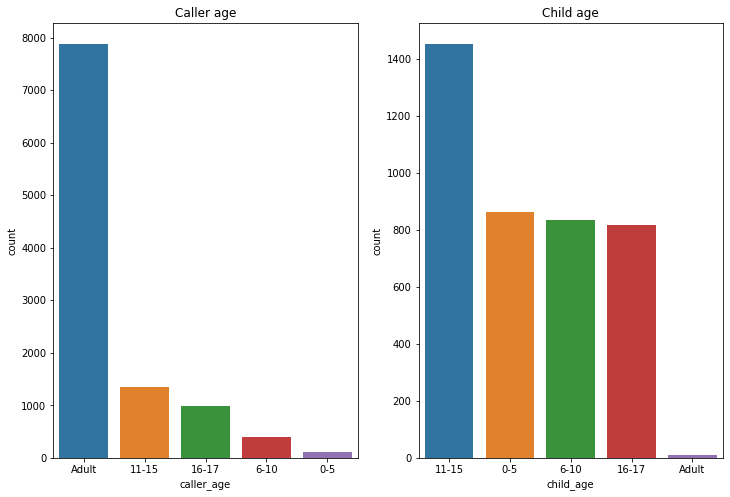

In [34]:
#visualizing child_age column

fig , ax = plt.subplots(figsize=(12,8),ncols = 2)
sns.countplot(train_data.caller_age, order = train_data['caller_age'].value_counts().index, ax=ax[0]).set(title='Caller age')

sns.countplot(train_data.child_age, order = train_data['child_age'].value_counts().index, ax=ax[1]).set(title='Child age')


##### 4.2 Relationship between counties and child abuse

Text(0, 0.5, 'num_of_child_abuse')

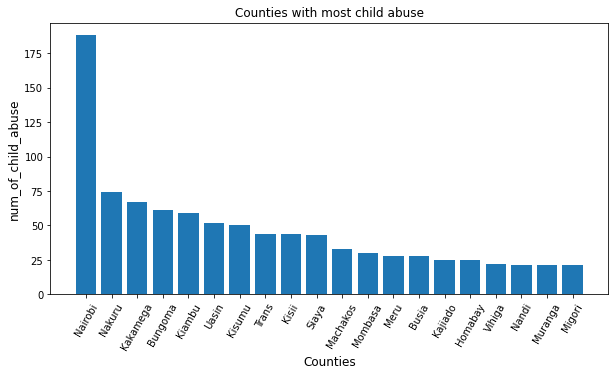

In [35]:
#grouping data to get the top 20 counties.

grouped_data = train_data.groupby("child_county").count().sort_values(by = 'referal',ascending = False)
grouped_data.reset_index(inplace = True)
top_20_counties = grouped_data[:20]

#Ploting to 20 counties with high cases of child abuse

fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(height = top_20_counties['referal'] , x=top_20_counties['child_county'] )
ax.tick_params(axis = "x",labelrotation = 60)
ax.set_title('Counties with most child abuse')
ax.set_xlabel('Counties',fontsize=12)
ax.set_ylabel('num_of_child_abuse',fontsize=12)


##### 4.3 Categories of child abuse

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


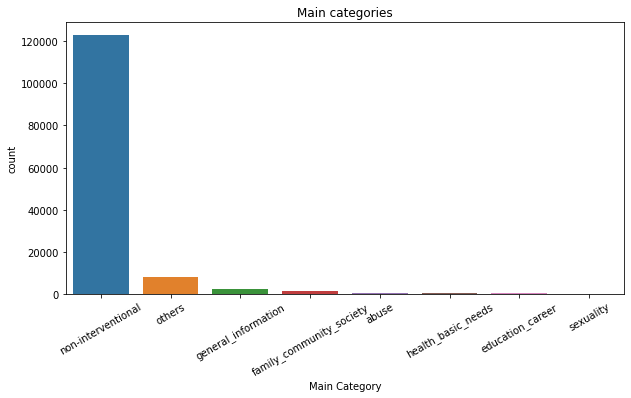

In [36]:
fig , ax = plt.subplots(figsize=(10,5))

sns.countplot(train_data.maincat, order = train_data['maincat'].value_counts().index)
plt.title('Main categories')
plt.xlabel('Main Category')
ax.tick_params(axis = 'x',labelrotation = 30)

##### 4.4 Categories of child abuse without non-interventional category


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


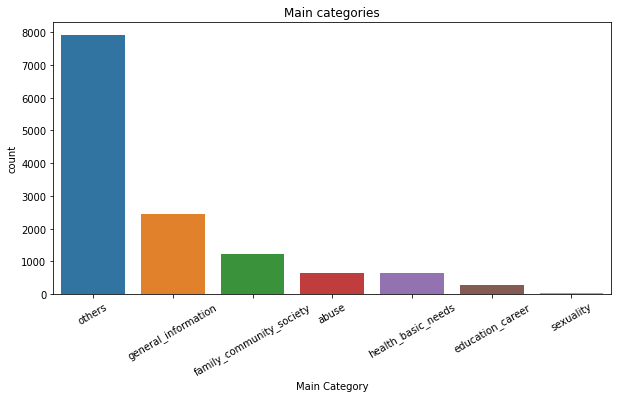

In [37]:
#dropping non-interventional category

interventional = train_data[train_data['maincat'] != 'non-interventional']

#plotting main categories

train_data = train_data
fig , ax = plt.subplots(figsize=(10,5))

sns.countplot(interventional.maincat, order = interventional['maincat'].value_counts().index)
plt.title('Main categories')
plt.xlabel('Main Category')
ax.tick_params(axis = 'x',labelrotation = 30)

##### 4.5 Relationship between date and abuse

In [38]:
train_data['calldate'].value_counts()

2016-04-01 10:21:00    9
2016-04-06 23:00:00    7
2016-04-07 08:47:00    6
2016-04-09 15:44:00    6
2016-04-06 16:33:00    5
                      ..
2016-02-23 22:44:08    1
2016-02-23 22:43:50    1
2016-02-23 22:42:00    1
2016-02-23 22:41:48    1
2016-07-12 23:57:28    1
Name: calldate, Length: 132382, dtype: int64

In [39]:
#change calldata dtype to datetime

train_data.calldate = pd.to_datetime(train_data.calldate)

#remove seconds and minutes from time

train_data =train_data.assign(calldate=train_data.calldate.dt.round('H'))
train_data.head(2)

,calldate,cc_status,maincat,subcat1,casepriority,referal,caller_gender,caller_age,caller_county,child_age,child_gender,child_county,parent_gender,abuser_relationship
0,2016-01-01 07:00:00,Closed,non-interventional,Blank call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,2016-01-01 08:00:00,Closed,non-interventional,Blank call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [40]:
#spliting calldate column into date and time

train_data['Dates'] = pd.to_datetime(train_data['calldate']).dt.date
train_data['Time'] = pd.to_datetime(train_data['calldate']).dt.time
train_data['Dates'].value_counts()

2016-07-06    1916
2016-07-07    1895
2016-07-08    1865
2016-07-11    1861
2016-07-12    1493
              ... 
2016-04-29     146
2016-04-17      97
2016-04-03      29
2016-07-13      21
2016-04-19       9
Name: Dates, Length: 188, dtype: int64

Text(0, 0.5, 'No_of_ times')

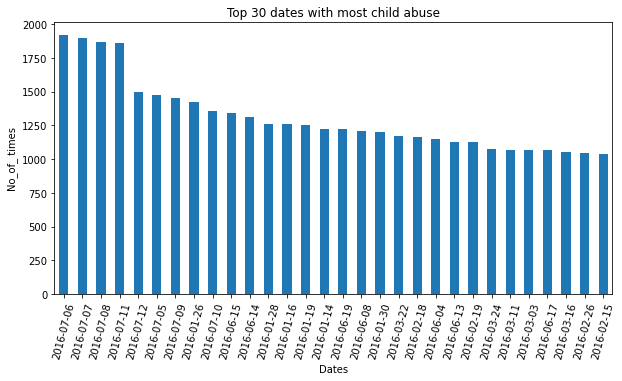

In [41]:
#Ploting the top 30 dates with most child abuse
fig , ax = plt.subplots(figsize=(10,5))
top_20_dates = train_data['Dates'].value_counts()[:30].plot(kind='bar')
ax.tick_params(axis = "x",labelrotation = 75)
ax.set_title('Top 30 dates with most child abuse')
ax.set_xlabel('Dates')
ax.set_ylabel('No_of_ times')

Text(0, 0.5, 'No_of_ times')

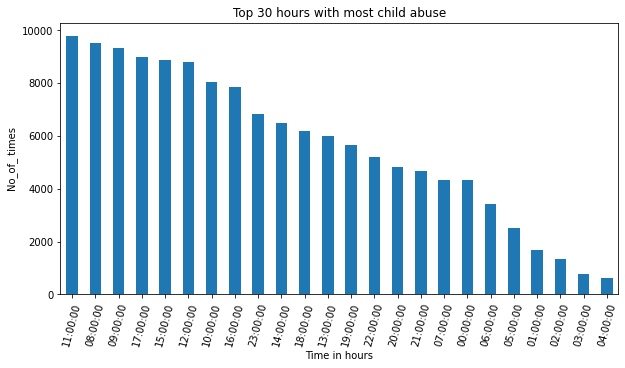

In [42]:
#Ploting the top 30 day times with most child abuse
fig , ax = plt.subplots(figsize=(10,5))
top_20_dates = train_data['Time'].value_counts()[:30].plot(kind='bar')
ax.tick_params(axis = "x",labelrotation = 75)
ax.set_title('Top 30 hours with most child abuse')
ax.set_xlabel('Time in hours')
ax.set_ylabel('No_of_ times')

##### 4.6 Relationship between holiday and abuse

In [43]:
holiday_data.value_counts()

Date        Holiday            
2016/01/01  New Years Day          1
2016/03/25  Good Friday            1
2016/03/28  Easter Monday          1
2016/05/01  Labour Day             1
2016/05/02  Labour Day observed    1
2016/06/01  Madaraka Day           1
2016/07/07  Eid Al Fitr            1
2016/09/11  Idd-Ul-Adha            1
2016/10/20  Mashujaa Day           1
2016/12/12  Jamhuri Day            1
2016/12/25  Christmas Day          1
2016/12/26  Boxing Day             1
2016/12/27  Christmas Holiday      1
dtype: int64

In [44]:
#importing datetime library
from datetime import datetime
#creating a day and month column
train_data["month"]=train_data["calldate"].apply(lambda x: datetime.strftime(x,"%m"))
train_data["day"]=train_data["calldate"].apply(lambda x: datetime.strftime(x,"%d"))

In [45]:
#Identifying holidays using dates and months from holiday_data
pub_holiday=pd.Series([])
for i in range(len(train_data)):
    if train_data["month"][i]=="01" and train_data["day"][i]=="01":
        pub_holiday[i]="New Years"
    elif train_data["month"][i]=="03" and train_data["day"][i]=="25":
        pub_holiday[i]="Good Friday"
    elif train_data["month"][i]=="03" and train_data["day"][i]=="28":
        pub_holiday[i]="Easter Monday"
    elif train_data["month"][i]=="05" and train_data["day"][i]=="01":
        pub_holiday[i]="Labour Day"
    elif train_data["month"][i]=="05" and train_data["day"][i]=="02":
        pub_holiday[i]="Labour Day observed"
    elif train_data["month"][i]=="06" and train_data["day"][i]=="01":
        pub_holiday[i]="Madaraka Day"
    elif train_data["month"][i]=="07" and train_data["day"][i]=="07":
        pub_holiday[i]="Eid Al Fitr"
    elif train_data["month"][i]=="09" and train_data["day"][i]=="11":
        pub_holiday[i]="Idd-Ul-Adha"
    elif train_data["month"][i]=="10" and train_data["day"][i]=="20":
        pub_holiday[i]="Mashujaa Day"
    elif train_data["month"][i]=="12" and train_data["day"][i]=="12":
        pub_holiday[i]="Jamhuri Day"
    elif train_data["month"][i]=="12" and train_data["day"][i]=="25":
        pub_holiday[i]="Christmas Day"
    elif train_data["month"][i]=="12" and train_data["day"][i]=="26":
        pub_holiday[i]="Boxing Day"
    elif train_data["month"][i]=="12" and train_data["day"][i]=="27":
        pub_holiday[i]="Christmas Holiday"
    else :
        pub_holiday[i]="notholiday"




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


In [46]:
#adding public holidays to the dataframe
train_data.insert(18,"pubHolidays",pub_holiday)
train_data.head(2)

,calldate,cc_status,maincat,subcat1,casepriority,referal,caller_gender,caller_age,caller_county,child_age,child_gender,child_county,parent_gender,abuser_relationship,Dates,Time,month,day,pubHolidays
0,2016-01-01 07:00:00,Closed,non-interventional,Blank call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-01-01,07:00:00,01,01,New Years
1,2016-01-01 08:00:00,Closed,non-interventional,Blank call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-01-01,08:00:00,01,01,New Years


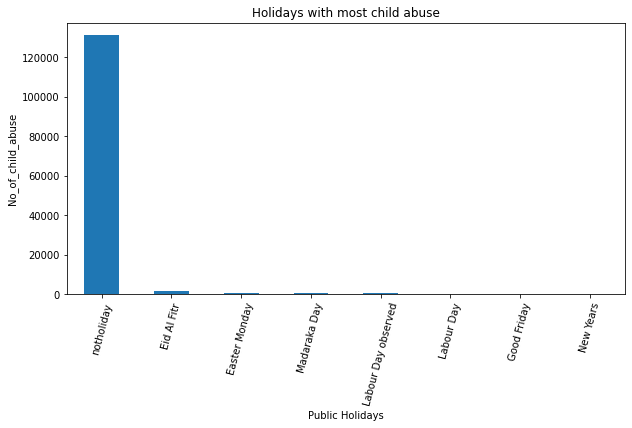

In [47]:
#ploting holidays with most child abuse

fig , ax = plt.subplots(figsize=(10,5))

train_data['pubHolidays'].value_counts().plot(kind='bar')
ax.tick_params(axis = "x",labelrotation = 75)
ax.set_title('Holidays with most child abuse')
ax.set_xlabel('Public Holidays')
ax.set_ylabel('No_of_child_abuse');

In [48]:
# remove rows by filtering the non-holiday days
hol_day = train_data[train_data['pubHolidays'] != 'notholiday']
# display the dataframe
hol_day.head()

,calldate,cc_status,maincat,subcat1,casepriority,referal,caller_gender,caller_age,caller_county,child_age,child_gender,child_county,parent_gender,abuser_relationship,Dates,Time,month,day,pubHolidays
0,2016-01-01 07:00:00,Closed,non-interventional,Blank call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-01-01,07:00:00,01,01,New Years
1,2016-01-01 08:00:00,Closed,non-interventional,Blank call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-01-01,08:00:00,01,01,New Years
2,2016-01-01 08:00:00,Closed,non-interventional,Blank call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-01-01,08:00:00,01,01,New Years
3,2016-01-01 08:00:00,Closed,others,Unrelated to remit of Childline 116,Non Critical,NaN,Male,Adult,Nyeri,NaN,NaN,NaN,NaN,None,2016-01-01,08:00:00,01,01,New Years
4,2016-01-01 08:00:00,Closed,non-interventional,Blank call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-01-01,08:00:00,01,01,New Years


Text(0, 0.5, 'No_of_child_abuse')

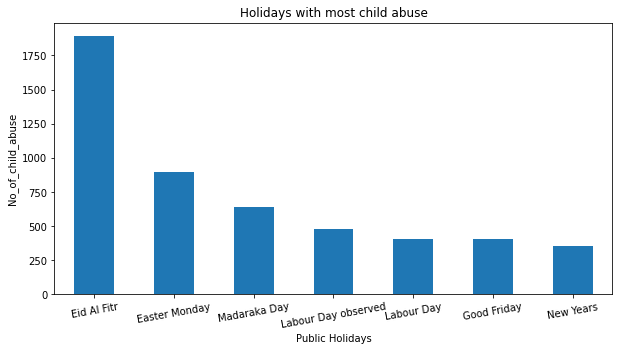

In [49]:
#ploting holidays with most child abuse
fig , ax = plt.subplots(figsize=(10,5))
hol_day['pubHolidays'].value_counts().plot(kind='bar')
ax.tick_params(axis = "x",labelrotation = 10)
ax.set_title('Holidays with most child abuse')
ax.set_xlabel('Public Holidays')
ax.set_ylabel('No_of_child_abuse')

##### 4.7 Relationship between School dates and abuse

In [50]:
date_data.value_counts()

Term  Opening     Closing   
1     2016-01-04  2016-04-08    1
2     2016-05-02  2016-08-05    1
3     2016-09-05  2016-11-18    1
dtype: int64

In [51]:
schdate=pd.Series([])
for i in range(len(train_data)):
     
    if train_data["month"][i]=="01" and (train_data["day"][i]=="01"):
        schdate[i]="notschooltime"
    elif train_data["month"][i]=="01" and (train_data["day"][i]=="02"):
        schdate[i]="notschooltime"
    elif train_data["month"][i]=="01" and (train_data["day"][i]=="03"):
        schdate[i]="notschooltime"
    
    elif train_data["month"][i]=="04" and train_data["day"][i]=="01" :
        schdate[i]="schooltime"
    elif train_data["month"][i]=="04" and (train_data["day"][i]=="02"):
        schdate[i]="schooltime"
    elif train_data["month"][i]=="04" and (train_data["day"][i]=="03"):
        schdate[i]="schooltime"
    elif train_data["month"][i]=="04" and (train_data["day"][i]=="04"):
        schdate[i]="schooltime"
    elif train_data["month"][i]=="04" and (train_data["day"][i]=="05"):
        schdate[i]="schooltime"
    elif train_data["month"][i]=="04" and (train_data["day"][i]=="06"):
        schdate[i]="schooltime"
    elif train_data["month"][i]=="04" and (train_data["day"][i]=="07"):
        schdate[i]="schooltime"
    elif train_data["month"][i]=="04" and (train_data["day"][i]=="08"):
        schdate[i]="schooltime"
    elif train_data["month"][i]=="04":
        schdate[i]="notschooltime"
    elif train_data["month"][i]=="05" and train_data["day"][i]=="01":
        schdate[i]="notschooltime"
    elif train_data["month"][i]=="05" and train_data["day"][i]!="01":
        schdate[i]="schooltime"
    else:
        schdate[i]="schooltime"
train_data.insert(19,"schooltimes",schdate)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [52]:
train_data[76000:78000]

,calldate,cc_status,maincat,subcat1,casepriority,referal,caller_gender,caller_age,caller_county,child_age,child_gender,child_county,parent_gender,abuser_relationship,Dates,Time,month,day,pubHolidays,schooltimes
76000,2016-04-10 08:00:00,Closed,non-interventional,Silent call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-04-10,08:00:00,04,10,notholiday,notschooltime
76001,2016-04-10 08:00:00,Closed,non-interventional,Silent call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-04-10,08:00:00,04,10,notholiday,notschooltime
76002,2016-04-10 08:00:00,Closed,non-interventional,Silent call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-04-10,08:00:00,04,10,notholiday,notschooltime
76003,2016-04-10 08:00:00,Closed,non-interventional,Blank call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-04-10,08:00:00,04,10,notholiday,notschooltime
76004,2016-04-10 08:00:00,Closed,non-interventional,Silent call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-04-10,08:00:00,04,10,notholiday,notschooltime
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77995,2016-04-22 09:00:00,Closed,non-interventional,Silent call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-04-22,09:00:00,04,22,notholiday,notschooltime
77996,2016-04-22 09:00:00,Referred,family_community_society,Maintenance & custody,Non Critical,children office/court,Female,Adult,Kiambu,0-5,Male,Kiambu,NaN,None,2016-04-22,09:00:00,04,22,notholiday,notschooltime
77997,2016-04-22 09:00:00,Closed,others,Insufficient information,Non Critical,NaN,Female,Adult,Isiolo,NaN,NaN,NaN,NaN,None,2016-04-22,09:00:00,04,22,notholiday,notschooltime
77998,2016-04-22 09:00:00,Closed,non-interventional,Blank call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-04-22,09:00:00,04,22,notholiday,notschooltime


In [53]:
# Checking the first date
train_data["calldate"].min()


Timestamp('2016-01-01 07:00:00')

In [54]:
# remove rows by filtering the non-holiday days
open_close_days = train_data[(train_data['calldate'] == '2016-01-04') | (train_data['calldate'] == '2016-04-08') | (train_data['calldate'] == '2016-05-02')]
# display the dataframe
open_close_days

,calldate,cc_status,maincat,subcat1,casepriority,referal,caller_gender,caller_age,caller_county,child_age,child_gender,child_county,parent_gender,abuser_relationship,Dates,Time,month,day,pubHolidays,schooltimes
1098,2016-01-04,Closed,non-interventional,Silent call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-01-04,00:00:00,01,04,notholiday,schooltime
1099,2016-01-04,Closed,non-interventional,Silent call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-01-04,00:00:00,01,04,notholiday,schooltime
1100,2016-01-04,Closed,non-interventional,Silent call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-01-04,00:00:00,01,04,notholiday,schooltime
1101,2016-01-04,Closed,non-interventional,Silent call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-01-04,00:00:00,01,04,notholiday,schooltime
1102,2016-01-04,Closed,non-interventional,Silent call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-01-04,00:00:00,01,04,notholiday,schooltime
1103,2016-01-04,Closed,non-interventional,Blank call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-01-04,00:00:00,01,04,notholiday,schooltime
1104,2016-01-04,Closed,non-interventional,Silent call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-01-04,00:00:00,01,04,notholiday,schooltime
1105,2016-01-04,Closed,non-interventional,Silent call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-01-04,00:00:00,01,04,notholiday,schooltime
1106,2016-01-04,Open,sexuality,Reproductive health,Non Critical,NaN,Female,16-17,Nairobi,16-17,Male,Nairobi,NaN,None,2016-01-04,00:00:00,01,04,notholiday,schooltime
74765,2016-04-08,Closed,non-interventional,Silent call,Non Critical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,2016-04-08,00:00:00,04,08,notholiday,schooltime


In [55]:
#rename

Text(0, 0.5, 'No_of_child_abuse')

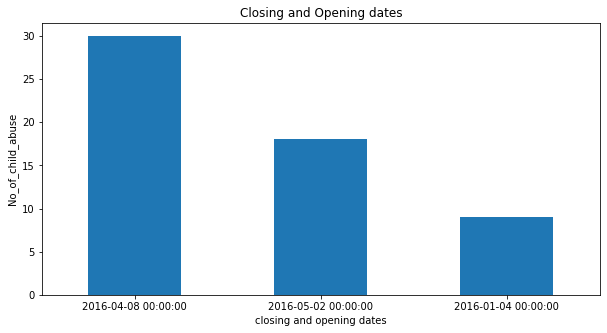

In [56]:
# ploting a graph to check on opening and closing date
fig , ax = plt.subplots(figsize=(10,5))
open_close_days['calldate'].value_counts().plot(kind='bar')
ax.tick_params(axis = "x",labelrotation = 0)
ax.set_title('Closing and Opening dates')
ax.set_xlabel('closing and opening dates')
ax.set_ylabel('No_of_child_abuse')

#### 4.8 Relationship between abuser and child

In [57]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135988 entries, 0 to 135987
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   calldate             135988 non-null  datetime64[ns]
 1   cc_status            135988 non-null  object        
 2   maincat              135988 non-null  object        
 3   subcat1              135988 non-null  object        
 4   casepriority         135988 non-null  object        
 5   referal              1262 non-null    object        
 6   caller_gender        11548 non-null   object        
 7   caller_age           10732 non-null   object        
 8   caller_county        8667 non-null    object        
 9   child_age            3979 non-null    object        
 10  child_gender         3992 non-null    object        
 11  child_county         3749 non-null    object        
 12  parent_gender        69 non-null      object        
 13  abuser_relatio

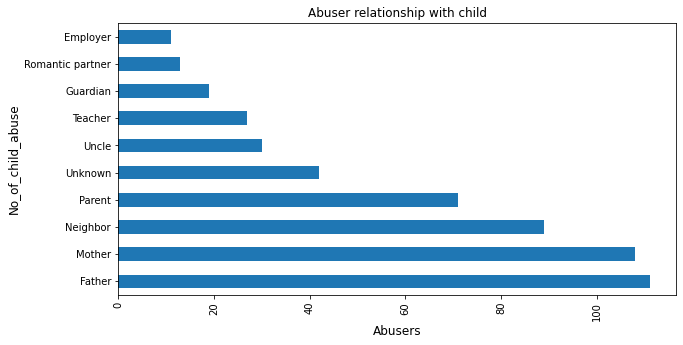

In [58]:
#ploting top 10 abusers

fig , ax = plt.subplots(figsize=(10,5))
train_data['abuser_relationship'].value_counts()[:10].plot(kind='barh')
ax.tick_params(axis = "x",labelrotation = 90)
ax.set_title('Abuser relationship with child')
ax.set_xlabel('Abusers',fontsize=12)
ax.set_ylabel('No_of_child_abuse',fontsize=12);

#### 4.9 Number of abuse cases  refered to different organizations

Text(0, 0.5, 'No_of_child_abuse')

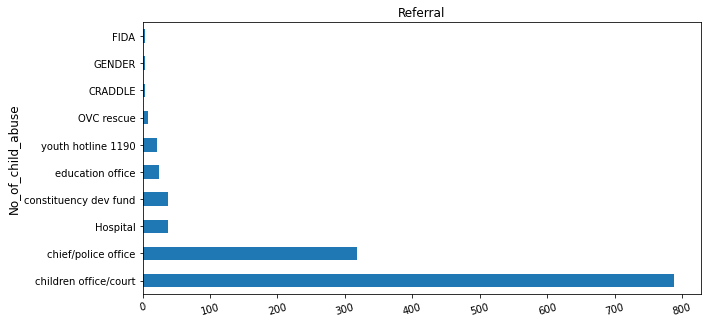

In [59]:
#Ploting the referal
fig , ax = plt.subplots(figsize=(10,5))
train_data['referal'].value_counts()[:10].plot(kind='barh')
ax.tick_params(axis = "x",labelrotation = 15)
ax.set_title('Referral')
ax.set_ylabel('No_of_child_abuse',fontsize=12)

#### 4.10 Call categories made

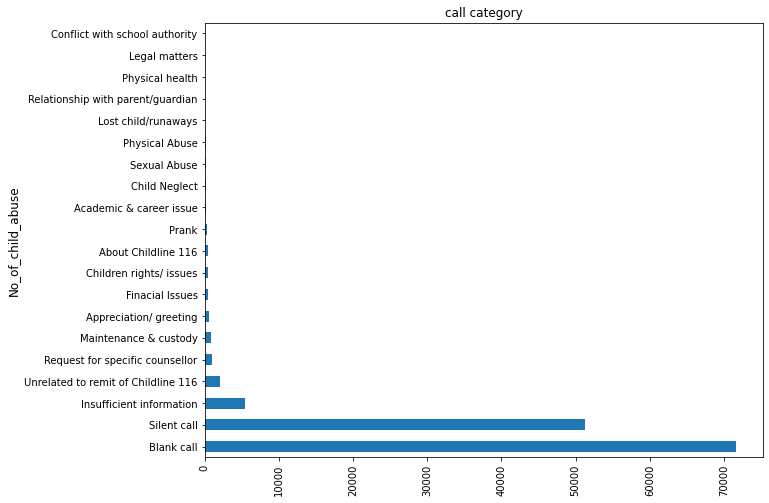

In [60]:
#Ploting the call category

fig , ax = plt.subplots(figsize=(10,8))

train_data['subcat1'].value_counts()[:20].plot(kind='barh')
ax.tick_params(axis = "x",labelrotation = 90)
ax.set_title('call category')
ax.set_ylabel('No_of_child_abuse',fontsize=12);

#### 4.11 Relationship between gender and abuse

In [61]:
train_data['child_gender'].value_counts()

Female     2065
Male       1921
Unknown       6
Name: child_gender, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0.5, 1.0, 'Caller gender')]

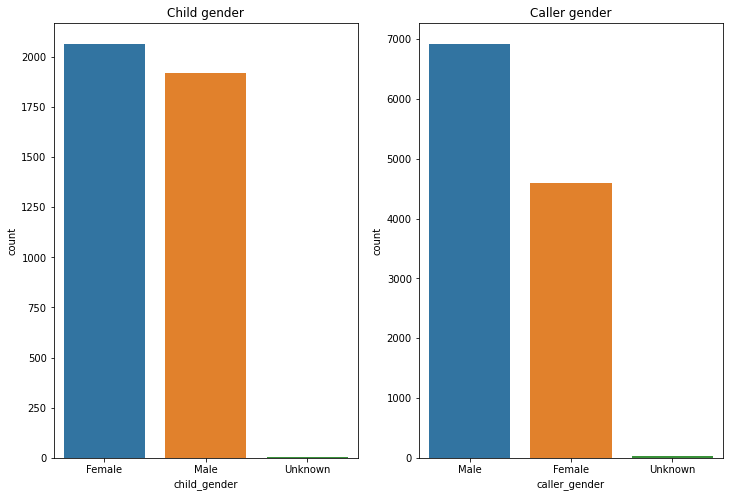

In [62]:
fig, axs = plt.subplots(figsize=(12,8),ncols=2)

sns.countplot(train_data.child_gender, order = train_data['child_gender'].value_counts().index, ax=axs[0]).set(title='Child gender')
sns.countplot(train_data.caller_gender, order = train_data['caller_gender'].value_counts().index, ax=axs[1]).set(title='Caller gender')


## **5.0 PRE PROCESSING**

In [63]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135988 entries, 0 to 135987
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   calldate             135988 non-null  datetime64[ns]
 1   cc_status            135988 non-null  object        
 2   maincat              135988 non-null  object        
 3   subcat1              135988 non-null  object        
 4   casepriority         135988 non-null  object        
 5   referal              1262 non-null    object        
 6   caller_gender        11548 non-null   object        
 7   caller_age           10732 non-null   object        
 8   caller_county        8667 non-null    object        
 9   child_age            3979 non-null    object        
 10  child_gender         3992 non-null    object        
 11  child_county         3749 non-null    object        
 12  parent_gender        69 non-null      object        
 13  abuser_relatio

In [64]:
ts_data = train_data.iloc[:,0:1]
ts_data.head()

,calldate
0,2016-01-01 07:00:00
1,2016-01-01 08:00:00
2,2016-01-01 08:00:00
3,2016-01-01 08:00:00
4,2016-01-01 08:00:00


In [65]:
from datetime import timedelta, datetime

In [66]:
for i in ts_data.calldate:

    def rounded_hours(time):
        # Rounds to nearest hour by adding a timedelta hour 
        return (time.replace(second=0, microsecond=0, minute=0, hour=time.hour)
                   +timedelta(hours=time.minute//60))


print(rounded_hours(i))

2016-07-13 00:00:00


In [67]:
#applying the function to the calldate column

ts_data['ds'] = ts_data.apply(lambda x: rounded_hours(x['calldate']), axis=1)

In [68]:
#assigning the call to each hour

ts_data.drop('calldate',axis=1,inplace=True)
ts_data.insert(1,value=1,column='call')
ts_data.head()

,ds,call
0,2016-01-01 07:00:00,1
1,2016-01-01 08:00:00,1
2,2016-01-01 08:00:00,1
3,2016-01-01 08:00:00,1
4,2016-01-01 08:00:00,1


In [69]:
ts_data['call'].value_counts()

1    135988
Name: call, dtype: int64

In [70]:
ts_data = ts_data.groupby('ds').count().reset_index()#.rename(columns={'call':'y'})
ts_data.head()

,ds,call
0,2016-01-01 07:00:00,1
1,2016-01-01 08:00:00,26
2,2016-01-01 09:00:00,32
3,2016-01-01 10:00:00,22
4,2016-01-01 11:00:00,53


In [71]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135988 entries, 0 to 135987
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   calldate             135988 non-null  datetime64[ns]
 1   cc_status            135988 non-null  object        
 2   maincat              135988 non-null  object        
 3   subcat1              135988 non-null  object        
 4   casepriority         135988 non-null  object        
 5   referal              1262 non-null    object        
 6   caller_gender        11548 non-null   object        
 7   caller_age           10732 non-null   object        
 8   caller_county        8667 non-null    object        
 9   child_age            3979 non-null    object        
 10  child_gender         3992 non-null    object        
 11  child_county         3749 non-null    object        
 12  parent_gender        69 non-null      object        
 13  abuser_relatio

In [72]:
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3723 non-null   datetime64[ns]
 1   call    3723 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 58.3 KB


### Check for stationarity

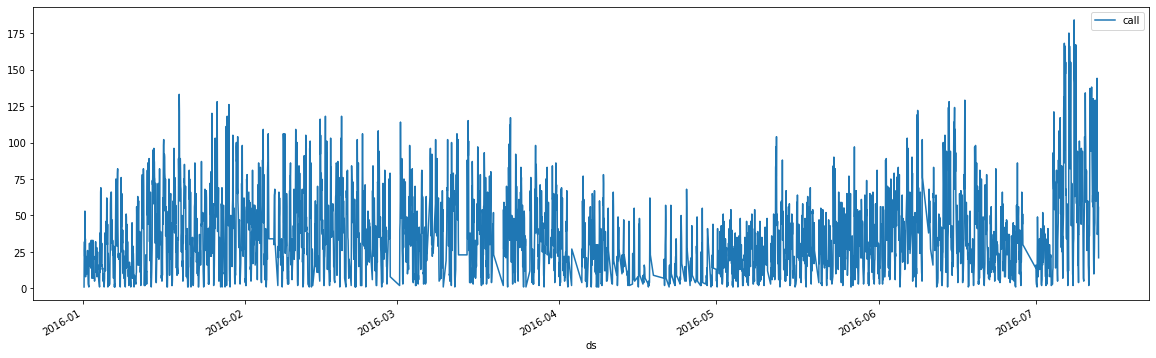

In [73]:
ax = ts_data.plot(x='ds', y='call', figsize=(20,6))

In [74]:
ts_data['ds'] = pd.to_datetime(ts_data['ds'])

# Set the 'Month' column as the index
ts = ts_data.set_index('ds')

In [75]:
ts.head()

,call
ds,
2016-01-01 07:00:00,1
2016-01-01 08:00:00,26
2016-01-01 09:00:00,32
2016-01-01 10:00:00,22
2016-01-01 11:00:00,53


**Null Hypothesis**: Time series data is not stationary

In [76]:
# a function to perform adfuller test

def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(ts)
    # Plot rolling statistics:
    fig = plt.figure(figsize=(20,6))
    plt.plot(TS, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

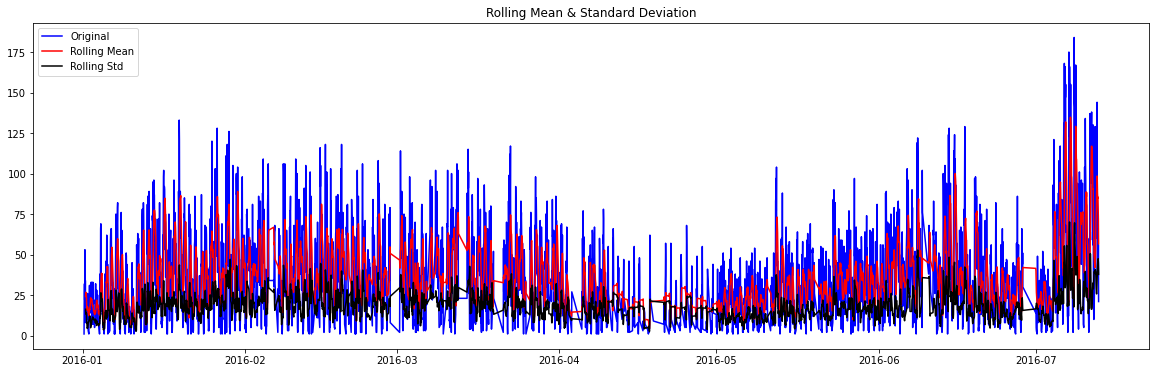

Results of Dickey-Fuller Test: 

Test Statistic                   -5.341144
p-value                           0.000004
#Lags Used                       28.000000
Number of Observations Used    3694.000000
Critical Value (1%)              -3.432121
Critical Value (5%)              -2.862323
Critical Value (10%)             -2.567187
dtype: float64


In [77]:
stationarity_check(ts)

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [79]:
additive_decomposition = seasonal_decompose(ts['call'], model='additive', period=30)
multiplicative_decomposition = seasonal_decompose(ts['call'], model='multiplicative', period=30)

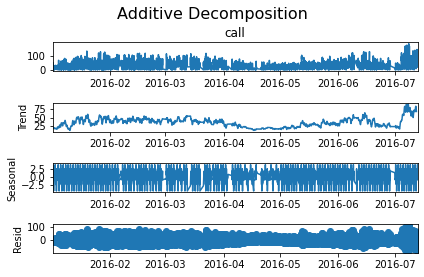

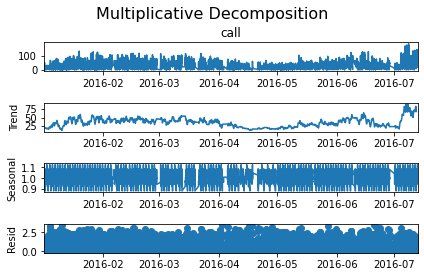

In [80]:
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

If we look at the residuals of the additive decomposition closely, it has some pattern left over.

The multiplicative decomposition, looks quite random which is good. So ideally, multiplicative decomposition should be preferred for this particular series.

We reject the null hypothesis because the Test Statstic is less than the Critical Value and the p-value is less than 0.05. Therefore, our time series data is stationary no need to detrend

## 6.0 MODELING

The ACF can answer some questions like:
-Is the observed time series white noise / random?- non zero correlations show relationship between the data points
-Is an observation related to an adjacent observation or other points within it?
-Can the observed time series be modeled with an MA model?

In [81]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

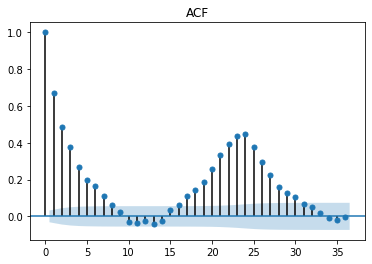

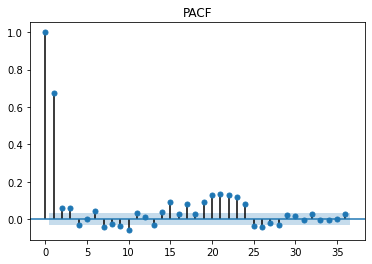

In [82]:
acf_plot = plot_acf(ts, title="ACF")
pacf_plot = plot_pacf(ts, title="PACF")

##### Conclusion
There is autocorrelation in the time series at several lags. Therefore, the time series is non-random.There is also significant partial correlations which further continues to support that the series is not random

The ACF and PACF plots should be considered together to define the process. For the AR process, we expect that the ACF plot will gradually decrease and simultaneously the PACF should have a sharp drop after p significant lags. To define a MA process, we expect the opposite from the ACF and PACF plots, meaning that: the ACF should show a sharp drop after a certain q number of lags while PACF should show a geometric or gradual decreasing trend. On the other hand, if both ACF and PACF plots demonstrate a gradual decreasing pattern, then the ARMA process should be considered for modeling.

## 7.0  TIME SERIES MODELING

In [83]:
import itertools

In [84]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [96]:
pip install skforecast 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.1 MB/s 
     |████████████████████████████████| 76 kB 4.7 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.64.1
    Uninstalling tqdm-4.64.1:
      Successfully uninstalled tqdm-4.64.1


In [138]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.2 MB/s 
     |████████████████████████████████| 9.8 MB 33.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
skforecast 0.4.3 requires statsmodels<=0.13,>=0.12, but you have statsmodels 0.13.2 which is incompatible.


In [139]:
import pmdarima as pm

In [141]:
sarima_model = pm.auto_arima(ts, 
                             m=12,
                             seasonal=True,
                             start_p=0,
                             start_q=0,
                             start_P=0,
                             start_Q=0,
                             max_order=6, 
                             test='adf',
                             error_action='warn',  
                             suppress_warnings=True,
                            
                              stepwise=True,
                              trace=False)

In [143]:
print(sarima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 3723
Model:             SARIMAX(3, 0, 0)x(2, 0, 0, 12)   Log Likelihood              -16373.190
Date:                            Wed, 14 Sep 2022   AIC                          32760.379
Time:                                    08:15:37   BIC                          32803.935
Sample:                                         0   HQIC                         32775.875
                                           - 3723                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.5313      0.662     14.389      0.000       8.233      10.830
ar.L1          0.5791      0.015   

In [144]:
p = d = q = range(0,2)

# Generate all different combinations of p, d , q and s
pdq = list(itertools.product(p, d, q))
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [145]:
p,d,q = range(0,3),[1],range(0,3)
P,D,Q,s = range(0,3),[1],range(0,3),[7]
# list of all parameter combos
pdq = list(itertools.product(p, d, q))
seasonal_pdq = list(itertools.product(P, D, Q, s))
all_param = list(itertools.product(pdq,seasonal_pdq))

In [147]:
ans = []
for comb in pdq:    
    for combs in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(ts,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            output = model.fit()
            ans.append([comb, combs, output.aic])
           
        except:
             continue

In [149]:
ts_df = pd.DataFrame(ans, columns=['pdq','pdqs', 'aic'])
ts_df

,pdq,pdqs,aic
0,"(0, 1, 0)","(0, 1, 0, 7)",36117.842046
1,"(0, 1, 0)","(0, 1, 1, 7)",33490.401507
2,"(0, 1, 0)","(0, 1, 2, 7)",33431.232285
3,"(0, 1, 0)","(1, 1, 0, 7)",35122.661647
4,"(0, 1, 0)","(1, 1, 1, 7)",33491.403237
...,...,...,...
76,"(2, 1, 2)","(1, 1, 1, 7)",32748.781620
77,"(2, 1, 2)","(1, 1, 2, 7)",32918.499673
78,"(2, 1, 2)","(2, 1, 0, 7)",33605.723191
79,"(2, 1, 2)","(2, 1, 1, 7)",32670.170409


In [151]:
ts_df.loc[ts_df['aic'].idxmin()]

pdq        (1, 1, 2)
pdqs    (2, 1, 2, 7)
aic     32636.970472
Name: 53, dtype: object

There is an improvement in AIC, so we use the order parameters pdq and pdqs as shown above

In [153]:
my_model = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 1, 2),
                                seasonal_order=(2, 1, 2, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = my_model.fit()

print(results.summary())

                                     SARIMAX Results                                     
Dep. Variable:                              call   No. Observations:                 3723
Model:             SARIMAX(1, 1, 2)x(2, 1, 2, 7)   Log Likelihood              -16310.485
Date:                           Wed, 14 Sep 2022   AIC                          32636.970
Time:                                   08:59:21   BIC                          32686.695
Sample:                                        0   HQIC                         32654.667
                                          - 3723                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6095      0.021     28.610      0.000       0.568       0.651
ma.L1         -1.0104      0.025    -39.775

The aic has improved. So lets check the distribution of residuals for this model

## Model Diagostic

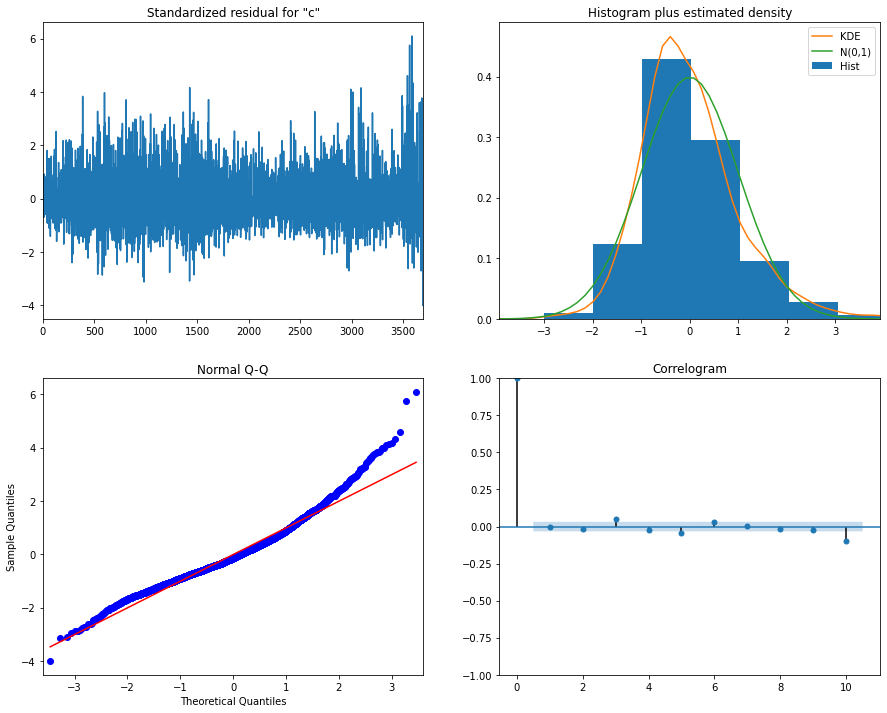

In [154]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

There is observed improvement in this new model. The AIC is lower, there is no correlation in the residuals and the Q-Q plot shows the residuals have been taken from a N(0,1). Also the histogram shows the distribution of the residuals with a mean of 0. So I will retain this model

# Forecasting and Model Evaluation

We compare predicted values to real values of the time series, which will help us understand the accuracy of our forecasts

In [174]:
holidays = pd.DataFrame({
  'holiday': 'holiday',
  'ds': pd.to_datetime(['2016-01-01', '2016-03-25', '2016-03-28',
                        '2016-05-01', '2016-05-02', '2016-06-01',
                        '2016-07-07'])
})
school_off = pd.DataFrame({
    'holiday': 'school_off',
    'ds' : pd.to_datetime(['2016-01-02','2016-01-03','2016-04-09','2016-04-10','2016-04-11','2016-04-12','2016-04-13',
                          '2016-04-14','2016-04-15','2016-04-16','2016-04-17','2016-04-18','2016-04-19','2016-04-20',
                          '2016-04-21','2016-04-22','2016-04-23','2016-04-24','2016-04-25','2016-04-26','2016-04-27',
                          '2016-04-28','2016-04-29','2016-04-30','2016-08-06','2016-08-07','2016-08-08',
                           '2016-08-09','2016-08-10','2016-08-11','2016-08-12','2016-08-13','2016-08-14','2016-08-15',
                           '2016-08-16','2016-08-17','2016-08-18','2016-08-19','2016-08-20','2016-08-21','2016-08-22',
                           '2016-08-23','2016-08-24','2016-08-25','2016-08-26','2016-08-27','2016-08-28','2016-08-29',
                           '2016-08-30','2016-08-31','2016-09-01','2016-09-02','2016-09-03','2016-09-04'])
})

holidays=pd.concat((holidays,school_off))

In [185]:
!pip install pystan==2.19.1.1
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 135 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6637505 sha256=8bf4b928773eff65429fd1ed83c554100c41051cb410e72d22b7541cc83d6f50
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet


In [186]:
from fbprophet import Prophet
import logging
logging.getLogger('fbprophet').setLevel(logging.ERROR)

In [209]:
ts.reset_index(inplace=True)

In [210]:
ts.head()

,ds,call
0,2016-01-01 07:00:00,1
1,2016-01-01 08:00:00,26
2,2016-01-01 09:00:00,32
3,2016-01-01 10:00:00,22
4,2016-01-01 11:00:00,53


In [216]:
ts.set_axis(['ds', 'y'],axis=1,inplace=True)

In [217]:
ts.head()

,ds,y
0,2016-01-01 07:00:00,1
1,2016-01-01 08:00:00,26
2,2016-01-01 09:00:00,32
3,2016-01-01 10:00:00,22
4,2016-01-01 11:00:00,53


In [222]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      3723 non-null   datetime64[ns]
 1   y       3723 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 58.3 KB


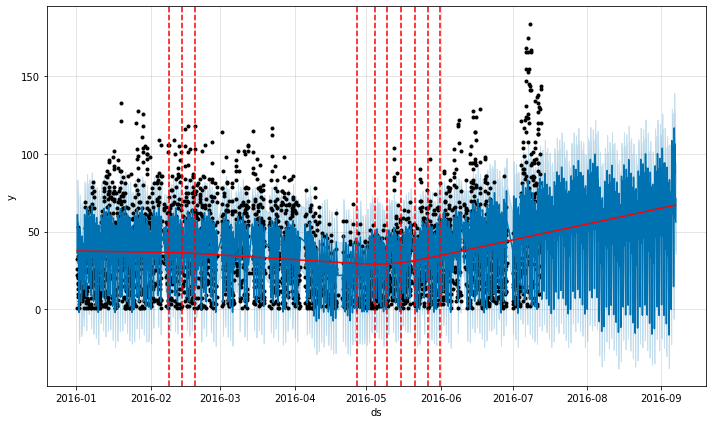

In [218]:
calls = Prophet(changepoint_prior_scale=0.005, 
            changepoint_range=0.8,
            seasonality_mode='multiplicative',
            interval_width=0.7,
            holidays=holidays).fit(ts)
future = calls.make_future_dataframe(periods=1344, freq='H')
fcst = calls.predict(future)
fig = calls.plot(fcst)
from fbprophet.plot import add_changepoints_to_plot
a = add_changepoints_to_plot(fig.gca(),calls, fcst)

In [220]:
from math import sqrt

In [223]:
print('Model Report:')
print()
fcst_y = fcst.loc[0:3722,['yhat']]
fcst_y = np.round(fcst_y).astype(int)
fcst_y = [0 if i<0 else i for i in fcst_y.yhat]
y = ts['y']
rmse_tr = sqrt(mean_squared_error(y, fcst_y))
print('Training RMSE:',rmse_tr)

Model Report:

Training RMSE: 20.747474434420443


### Cross Validating the Model

In [226]:
from fbprophet.diagnostics import cross_validation
ts_cv = cross_validation(calls, initial='2000 h', period='240 h', horizon = '48 h')
ts_cv.head()

  0%|          | 0/11 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-04-02 01:00:00,15.384800,-6.297710,36.194440,5,2016-04-02
1,2016-04-02 02:00:00,4.480278,-14.801271,24.029604,7,2016-04-02
2,2016-04-02 03:00:00,1.373543,-19.413717,21.391714,9,2016-04-02
3,2016-04-02 04:00:00,5.577408,-14.788261,25.909427,8,2016-04-02
4,2016-04-02 05:00:00,13.394844,-8.191344,33.024255,23,2016-04-02


In [225]:
# ts_cv = cross_validation(calls, initial='2000 h', period='240 h', horizon = '24 h')
# ts_cv.head()

  0%|          | 0/11 [00:00<?, ?it/s]

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2016-04-03 09:00:00,50.802859,30.375424,73.096916,2,2016-04-03
1,2016-04-03 10:00:00,57.042629,37.260513,76.427039,27,2016-04-03
2,2016-04-13 01:00:00,10.781078,-10.801170,31.670386,23,2016-04-13
3,2016-04-13 02:00:00,0.813440,-17.959631,20.983077,13,2016-04-13
4,2016-04-13 03:00:00,-1.854812,-22.435662,19.848561,12,2016-04-13


In [229]:
from fbprophet.diagnostics import performance_metrics
ts_perf = performance_metrics(ts_cv)
ts_perf.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
39,1 days 20:00:00,575.839683,23.996660,17.683252,0.446824,0.388335,0.642857
40,1 days 21:00:00,435.151023,20.860274,15.808214,0.506877,0.397804,0.648810
41,1 days 22:00:00,235.612424,15.349672,12.437548,0.508686,0.377589,0.755952
42,1 days 23:00:00,211.677980,14.549157,12.149942,0.823830,0.378590,0.809524
43,2 days 00:00:00,214.536369,14.647060,12.188384,0.961005,0.420528,0.833333


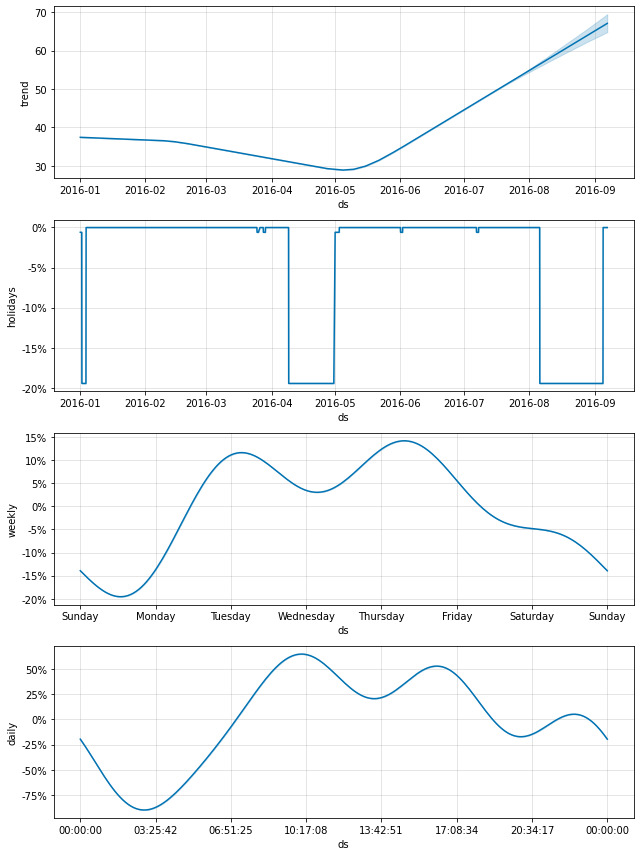

In [230]:
calls.plot_components(fcst);

In [233]:
forecasted_call_volume = fcst.loc[:,['ds','yhat_lower','yhat_upper','yhat']]
forecasted_call_volume.head()

,ds,yhat_lower,yhat_upper,yhat
0,2016-01-01 07:00:00,15.276736,58.475391,36.115757
1,2016-01-01 08:00:00,24.016883,70.608064,47.328368
2,2016-01-01 09:00:00,35.429082,78.701207,56.849306
3,2016-01-01 10:00:00,40.352944,83.528563,60.906481
4,2016-01-01 11:00:00,34.668882,79.296449,57.708920


## Challenging the solution